In [1]:
!pip install astropy --upgrade
!pip install photutils

import numpy as np
import math
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import glob
import warnings
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
bias_list = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Bias/*BIAS*.fits')

science_list = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Science/*0069.NGC4151*.fits')

flat_list = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Flats/*FLAT*.fits')

print(bias_list)
print(flat_list)
print(science_list)

['C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0001.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0002.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0003.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0004.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0005.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0006.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0007.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0008.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0009.BIAS.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Bias\\0010.BIAS.fits']
['C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0011.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0012.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0013.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0014.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0015.FLAT.fits', 'C:/Users/jimmy/OneDrive/Astron100/Day1/Flats\\0

In [192]:
f = fits.getheader(science_list[0])
f["OBJECT"]

'RXJ0602.1p2828'

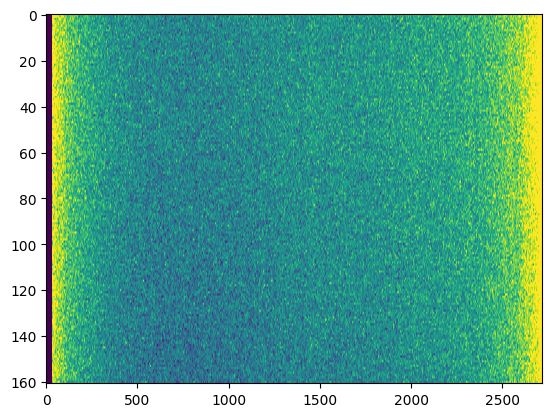

In [3]:
bias = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Bias/*BIAS*.fits')

master_bias = []

for i in bias:
  data = fits.getdata(i)
  master_bias.append(data[None])

master_bias = np.concatenate(master_bias, axis = 0)
master_bias = np.median(master_bias, axis = 0)

plt.imshow(master_bias, vmax = np.percentile(master_bias, 90),
          vmin = np.percentile(master_bias, 5),
          aspect = 'auto')

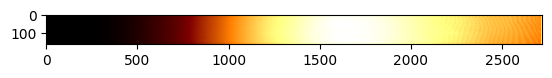

In [4]:
flats = glob.glob('C:/Users/jimmy/OneDrive/Astron100/Day1/Flats/*FLAT*.fits')

master_flat = []

for m in flats:
  data = fits.getdata(m)
  data = data - master_bias
  master_flat.append(data[None])

master_flat = np.concatenate(master_flat, axis = 0)
master_flat = np.median(master_flat, axis = 0)

plt.imshow(master_flat, vmax = np.percentile(master_flat, 99),
           vmin = np.percentile(master_flat, 10),
           cmap = 'afmhot')

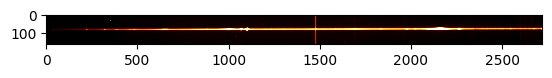

In [5]:
science = fits.getdata(science_list[0])

plt.imshow(science, vmax = np.percentile(science, 99),
           vmin = np.percentile(science, 10),
           cmap = 'afmhot')

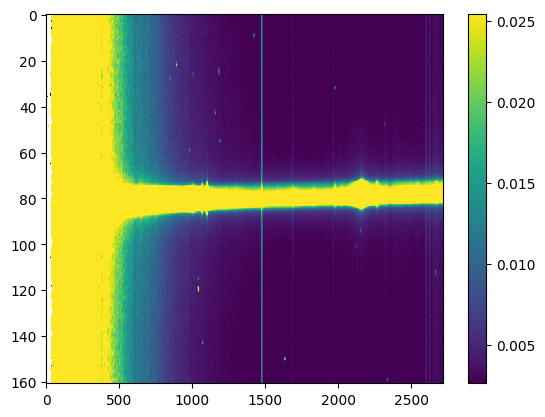

In [6]:
science = fits.getdata(science_list[0])
final = (science - master_bias) / master_flat

plt.imshow(final, vmax = np.percentile(final, 80),
          vmin = np.percentile(final, 25),
          aspect = 'auto')
plt.colorbar()

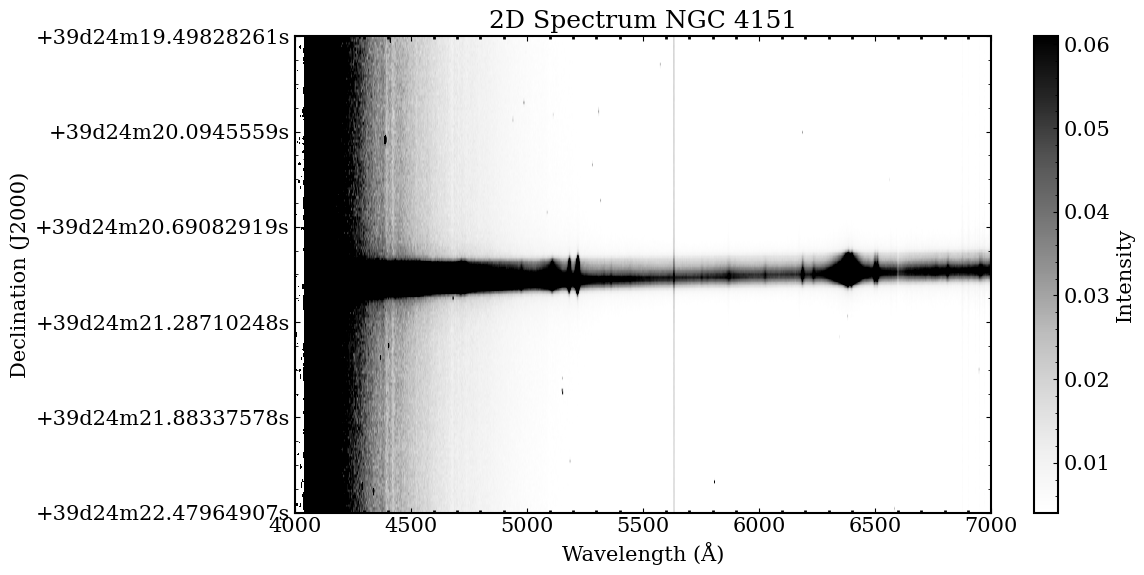

In [ ]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')


plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.labelspacing'] = 0.3
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams["axes.linewidth"] = 1.5

ny, nx = final.shape
wavelengths = np.linspace(4000, 7000, nx)

slit_width_arcsec = 3.0
pixel_scale_arcsec = slit_width_arcsec / ny
ref_pixel = 84
arcsec_offset = (np.arange(ny) - ref_pixel) * pixel_scale_arcsec

ref_coord = SkyCoord(ra='12h10m32.57598s', dec='+39d24m21.0635s', frame='icrs')



dec_positions = ref_coord.dec + arcsec_offset * u.arcsec
ra_positions = np.full(dec_positions.shape, ref_coord.ra.deg) * u.deg  # ← FIXED

sky_coords = SkyCoord(ra=ra_positions, dec=dec_positions, frame='icrs')


tick_indices = np.linspace(0, ny - 1, 6, dtype=int)
tick_labels = [sky_coords[i].to_string('hmsdms').split()[1] for i in tick_indices] 

plt.figure(figsize=(12, 6))
plt.imshow(final, 
           aspect='auto', 
           extent=[wavelengths[0], wavelengths[-1], arcsec_offset[-1], arcsec_offset[0]],
           cmap='Greys',
           vmax=np.percentile(final, 90),
           vmin=np.percentile(final, 50))

plt.xlabel("Wavelength (Å)")
plt.ylabel("Declination (J2000)")
plt.yticks(arcsec_offset[tick_indices], tick_labels) 
plt.colorbar(label='Intensity')
plt.title("2D Spectrum NGC 4151")
plt.tight_layout()
plt.show()


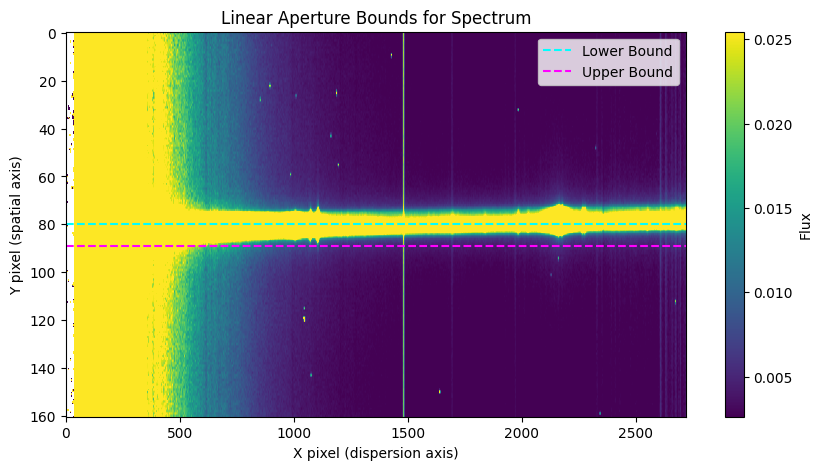

In [7]:
plt.figure(figsize=(10, 5))
plt.imshow(final, aspect='auto', cmap='viridis',
           vmin=np.percentile(final, 25), vmax=np.percentile(final, 80))
plt.axhline(80, color='cyan', linestyle='--', label='Lower Bound')
plt.axhline(89, color='magenta', linestyle='--', label='Upper Bound')
plt.legend()
plt.title("Linear Aperture Bounds for Spectrum")
plt.xlabel("X pixel (dispersion axis)")
plt.ylabel("Y pixel (spatial axis)")
plt.colorbar(label='Flux')
plt.show()

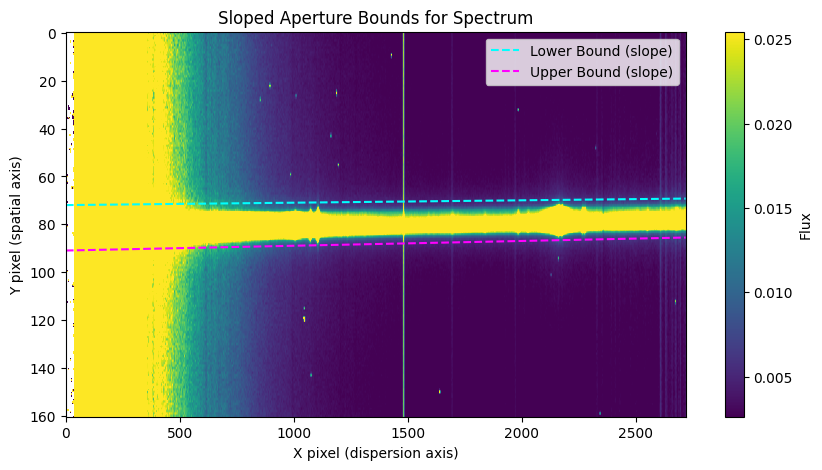

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_start = 0
x_end = final.shape[1]
x_range = np.arange(x_start, x_end)

lower_slope = -0.001
lower_intercept = 72
upper_slope = -0.002
upper_intercept = 91

lower_bounds = lower_slope * x_range + lower_intercept
upper_bounds = upper_slope * x_range + upper_intercept

plt.figure(figsize=(10, 5))
plt.imshow(final, aspect='auto', cmap='viridis',
           vmin=np.percentile(final, 25), vmax=np.percentile(final, 80))

plt.plot(x_range, lower_bounds, color='cyan', linestyle='--', label='Lower Bound (slope)')
plt.plot(x_range, upper_bounds, color='magenta', linestyle='--', label='Upper Bound (slope)')

plt.legend()
plt.title("Sloped Aperture Bounds for Spectrum")
plt.xlabel("X pixel (dispersion axis)")
plt.ylabel("Y pixel (spatial axis)")
plt.colorbar(label='Flux')
plt.show()


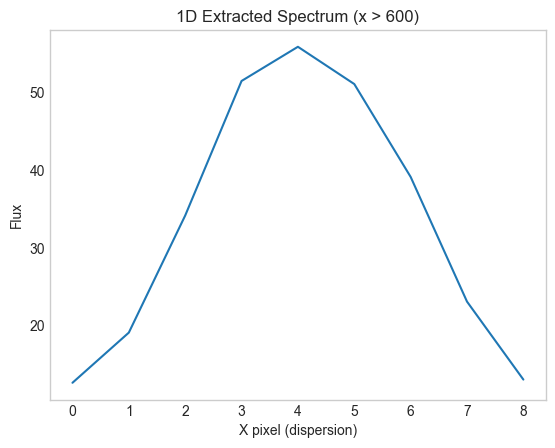

In [200]:
spectrum_1d_cropped = np.sum(final[80:89, 600:], axis=1)

plt.plot(spectrum_1d_cropped)
plt.title("1D Extracted Spectrum (x > 600)")
plt.xlabel("X pixel (dispersion)")
plt.ylabel("Flux")
plt.grid()
plt.show()

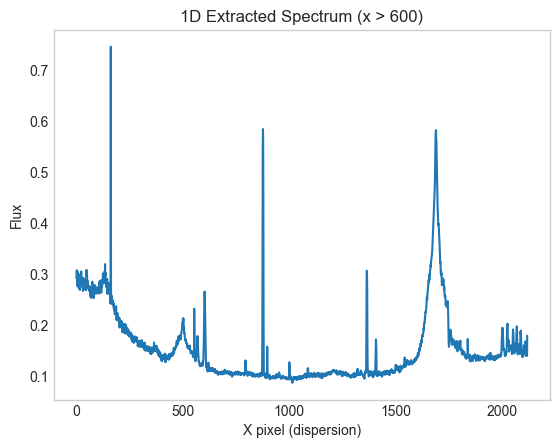

In [201]:
#spectrum_1d = np.sum(final[75:88, :], axis=0)

spectrum_1d_cropped = np.sum(final[75:88, 600:], axis=0)

plt.plot(spectrum_1d_cropped)
plt.title("1D Extracted Spectrum (x > 600)")
plt.xlabel("X pixel (dispersion)")
plt.ylabel("Flux")
plt.grid()
plt.show()

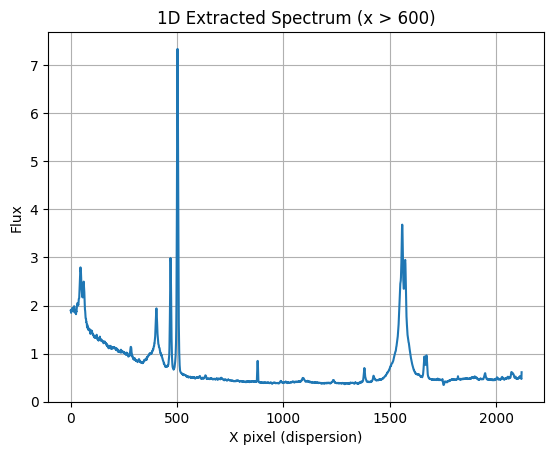

In [ ]:
import numpy as np

height, width = final.shape

x_start = 600
x_end = final.shape[1]
x_range = np.arange(x_start, x_end)

lower_slope = -0.001
lower_intercept = 72
upper_slope = -0.002
upper_intercept = 91

lower_bounds = (lower_slope * x_range + lower_intercept).astype(int)
upper_bounds = (upper_slope * x_range + upper_intercept).astype(int)

lower_bounds = np.clip(lower_bounds, 0, height - 1)
upper_bounds = np.clip(upper_bounds, 0, height - 1)

spectrum_1d_cropped = np.array([
    np.sum(final[lower:upper, x])
    for x, lower, upper in zip(x_range, lower_bounds, upper_bounds)
])

plt.plot(spectrum_1d_cropped)
plt.title("1D Extracted Spectrum (x > 600)")
plt.xlabel("X pixel (dispersion)")
plt.ylabel("Flux")
plt.grid()
plt.show()

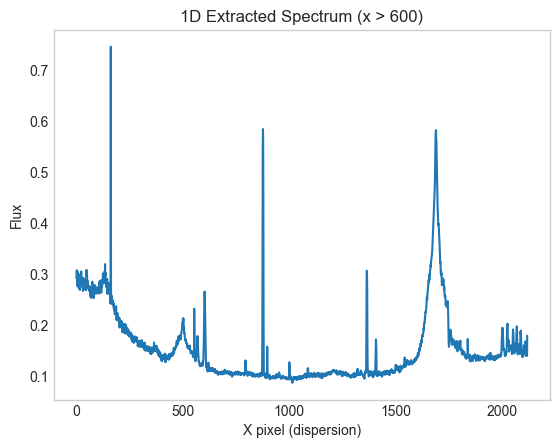

In [202]:
spectrum_1d = np.sum(final[75:88, :], axis=0)

plt.plot(spectrum_1d_cropped)
plt.title("1D Extracted Spectrum (x > 600)")
plt.xlabel("X pixel (dispersion)")
plt.ylabel("Flux")
plt.grid()
plt.show()

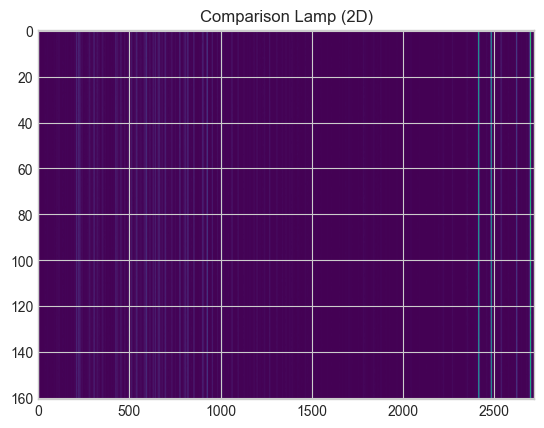

In [203]:
comp_path = 'C:/Users/jimmy/OneDrive/Astron100/Day1/Comp/0070.COMP_NGC4151.fits'
comp_data = fits.getdata(comp_path)

plt.imshow(comp_data, aspect='auto', cmap='viridis')
plt.title('Comparison Lamp (2D)')
plt.show()

In [204]:
fits.getheader(science_list[0])

ValueError: FITS header values must contain standard printable ASCII characters; "'28:28:19.4077\r    ' / DEC" contains characters not representable in ASCII or non-printable characters.

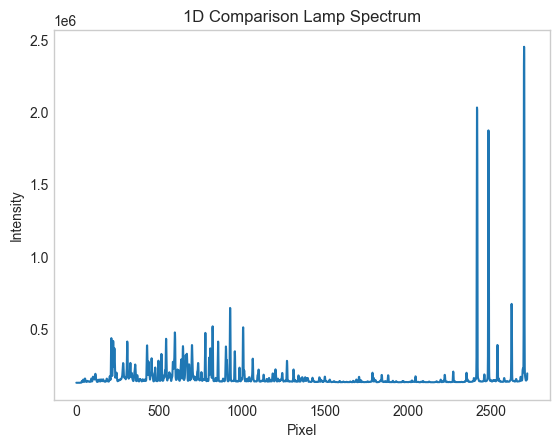

In [205]:
comp_spectrum_1d = np.sum(comp_data, axis=0)
plt.plot(comp_spectrum_1d)
plt.title('1D Comparison Lamp Spectrum')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.grid()
plt.show()

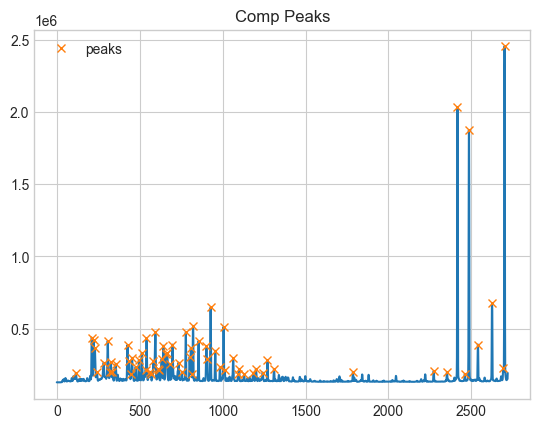

[ 115  211  222  230  242  282  307  321  326  334  355  427  435  448
  454  476  495  513  536  541  561  567  582  594  610  616  633  643
  660  666  680  697  735  754  778  801  808  814  822  855  902  907
  927  956  984 1006 1012 1064 1094 1099 1129 1184 1201 1242 1270 1310
 1786 2273 2353 2416 2460 2485 2539 2625 2693 2700]


66

In [206]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(comp_spectrum_1d, height=183000)  #edit this one
plt.plot(comp_spectrum_1d)
plt.plot(peaks, comp_spectrum_1d[peaks], "x", label='peaks')
plt.legend()
plt.title("Comp Peaks")
plt.show()
print(peaks)
len(peaks)

In [ ]:
import pandas as pd
column_names = ["wavelength", "start", "end", "width", "label"]
df = pd.read_csv('complines_fast.dat',
                      delim_whitespace=True,
                      names=column_names,
                      engine='python',
                      comment='#',
                      quotechar=' ',
                      skip_blank_lines=True, usecols=(0,1,2,3, 4))

df.to_csv('complines_readable.csv', index=False)

In [18]:
#Polynomial coefficients: [-1.68082138e-07  6.07623032e-04  8.74859881e-01  3.55690966e+03]

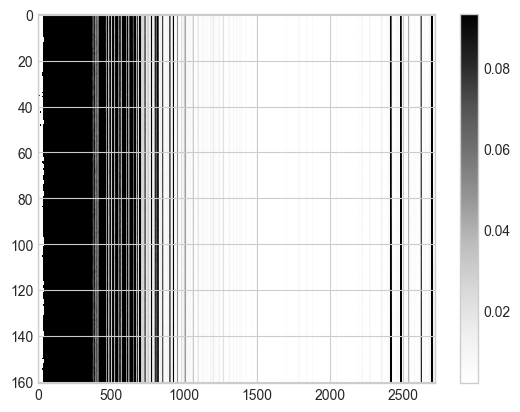

In [208]:
comp_final = (comp_data - master_bias) / master_flat

plt.imshow(comp_final, vmax = np.percentile(comp_final, 80),
          vmin = np.percentile(comp_final, 25),
          aspect = 'auto')
plt.colorbar()

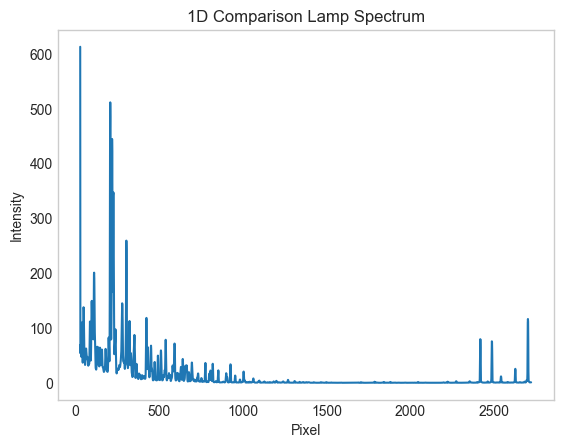

In [209]:
comp_spectrum_1d = np.sum(comp_final, axis=0)
plt.plot(comp_spectrum_1d)
plt.title('1D Comparison Lamp Spectrum')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.grid()
plt.show()

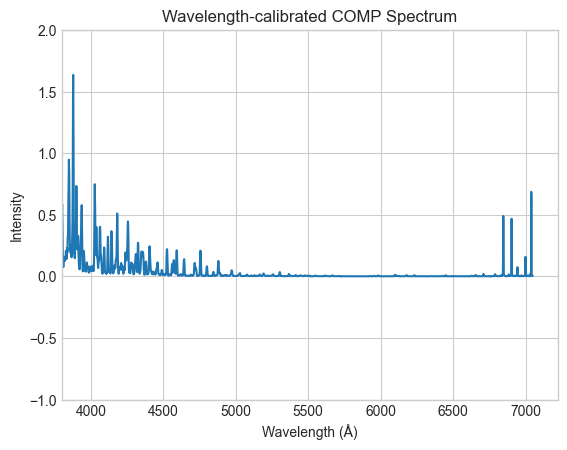

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

coeffs = [-1.68082138e-07, 6.07623032e-04, 8.74859881e-01, 3.55690966e+03]

num_pixels = comp_final.shape[-1]
pixels = np.arange(num_pixels)

wavelengths = np.polyval(coeffs, pixels)

plt.plot(wavelengths, comp_final[0])
plt.xlabel("Wavelength (Å)")
plt.xlim(left=3800)  
plt.ylabel("Intensity")
plt.title("Wavelength-calibrated COMP Spectrum")
plt.ylim(-1, 2)
plt.show()


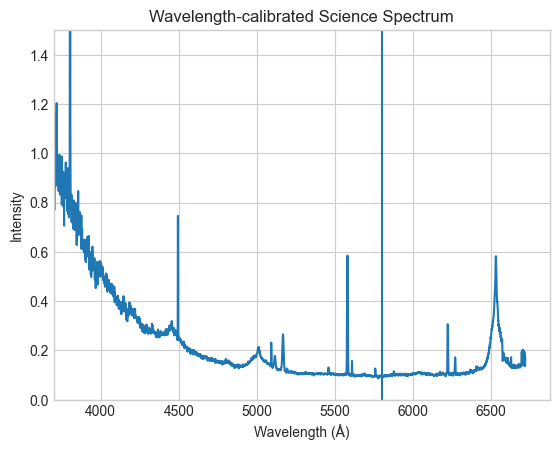

In [254]:
spectrum_1d = np.sum(final[75:88, :], axis=0)

coeffs = [-1.84582138e-07, 6.07623032e-04, 8.74859881e-01, 3.55690966e+03]

num_pixels = comp_final.shape[-1] 
pixels = np.arange(num_pixels)

wavelengths = np.polyval(coeffs, pixels)

plt.plot(wavelengths, spectrum_1d)
plt.xlabel("Wavelength (Å)")
plt.xlim(left=3700)  
plt.ylabel("Intensity")
plt.title("Wavelength-calibrated Science Spectrum")
plt.ylim(-0.0, 1.5)
plt.axvline(5799)
plt.show()

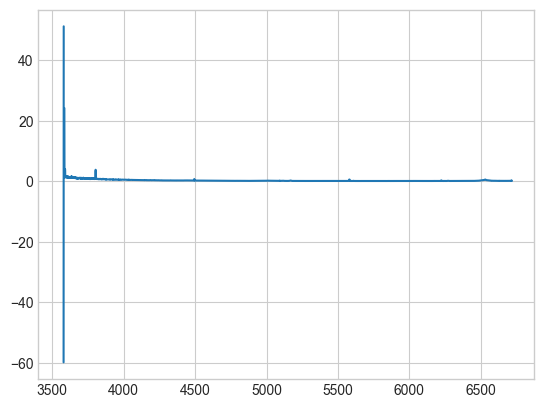

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from numpy.polynomial import Polynomial

spectrum_1d = np.sum(final[75:88, :], axis=0)
spectrum = spectrum_1d[0] if spectrum_1d.ndim > 1 else spectrum_1d
plt.plot(wavelengths, spectrum_1d)

smoothed = savgol_filter(spectrum, window_length=101, polyorder=4)

Valid points: 2691 / 2720


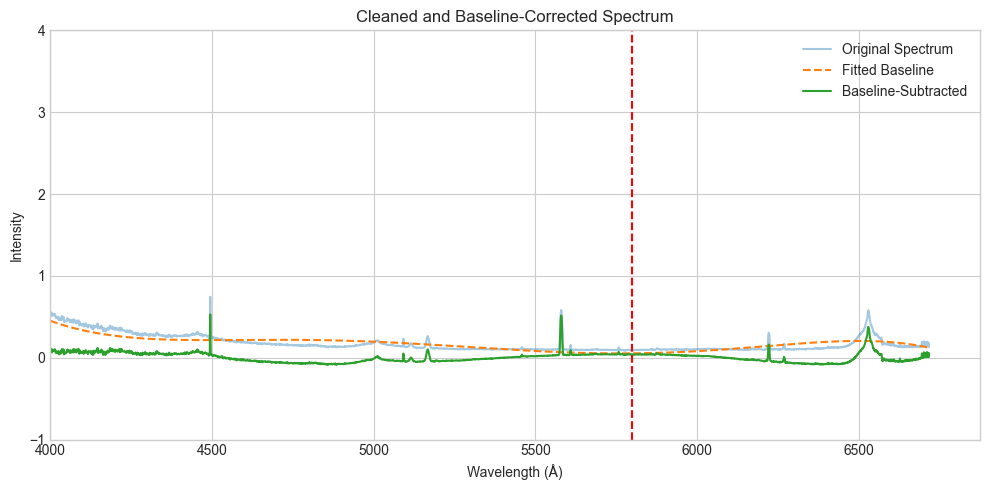

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

spectrum_1d = np.sum(final[75:88, :], axis=0)
spectrum = spectrum_1d[0] if spectrum_1d.ndim > 1 else spectrum_1d

assert len(spectrum) == len(wavelengths), "Mismatch in length between spectrum and wavelengths"

valid_mask = np.isfinite(spectrum) & np.isfinite(wavelengths)
clean_wavelengths = wavelengths[valid_mask]
clean_spectrum = spectrum[valid_mask]

print(f"Valid points: {np.sum(valid_mask)} / {len(spectrum)}")

fit = Polynomial.fit(clean_wavelengths, clean_spectrum, deg=5)
baseline = fit(clean_wavelengths)

flattened = clean_spectrum - baseline

plt.figure(figsize=(10, 5))
plt.plot(clean_wavelengths, clean_spectrum, label="Original Spectrum", alpha=0.4)
plt.plot(clean_wavelengths, baseline, label="Fitted Baseline", linestyle='--')
plt.plot(clean_wavelengths, flattened, label="Baseline-Subtracted", linewidth=1.5)
plt.axvline(5799, color='red', linestyle='--')
plt.xlabel("Wavelength (Å)")
plt.ylabel("Intensity")
plt.title("Cleaned and Baseline-Corrected Spectrum")
plt.legend()
plt.ylim(-1, 4)
plt.xlim(left=4000)
plt.grid(True)
plt.tight_layout()
plt.show()


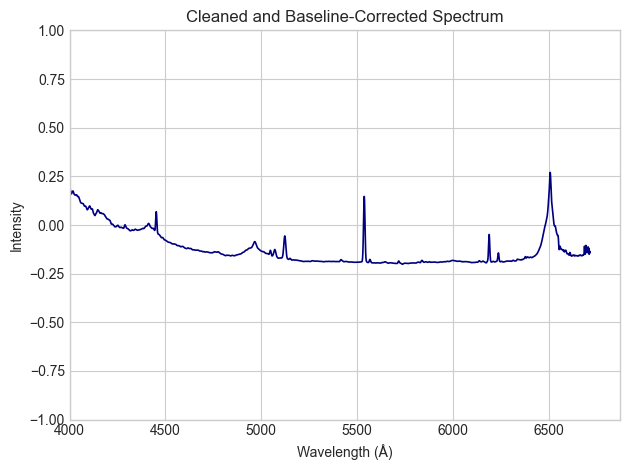

In [ ]:
from scipy.ndimage import gaussian_filter1d
smoothed = gaussian_filter1d(flattened, sigma=2) 

normalized = (smoothed - np.min(smoothed)) / (np.max(smoothed) - np.min(smoothed))

min_len = min(len(wavelengths), len(smoothed))
plt.plot(wavelengths[:min_len], smoothed[:min_len], linewidth=1.2, color='navy')
plt.xlabel("Wavelength (Å)")
plt.ylabel("Intensity")
plt.title("Cleaned and Baseline-Corrected Spectrum")
plt.legend()
plt.ylim(-1, 1)
plt.xlim(left=4000)
plt.grid(True)
plt.tight_layout()
plt.show()



2120
2120
Estimated V-band flux: 9.21e-14 erg/s/cm^2/Å


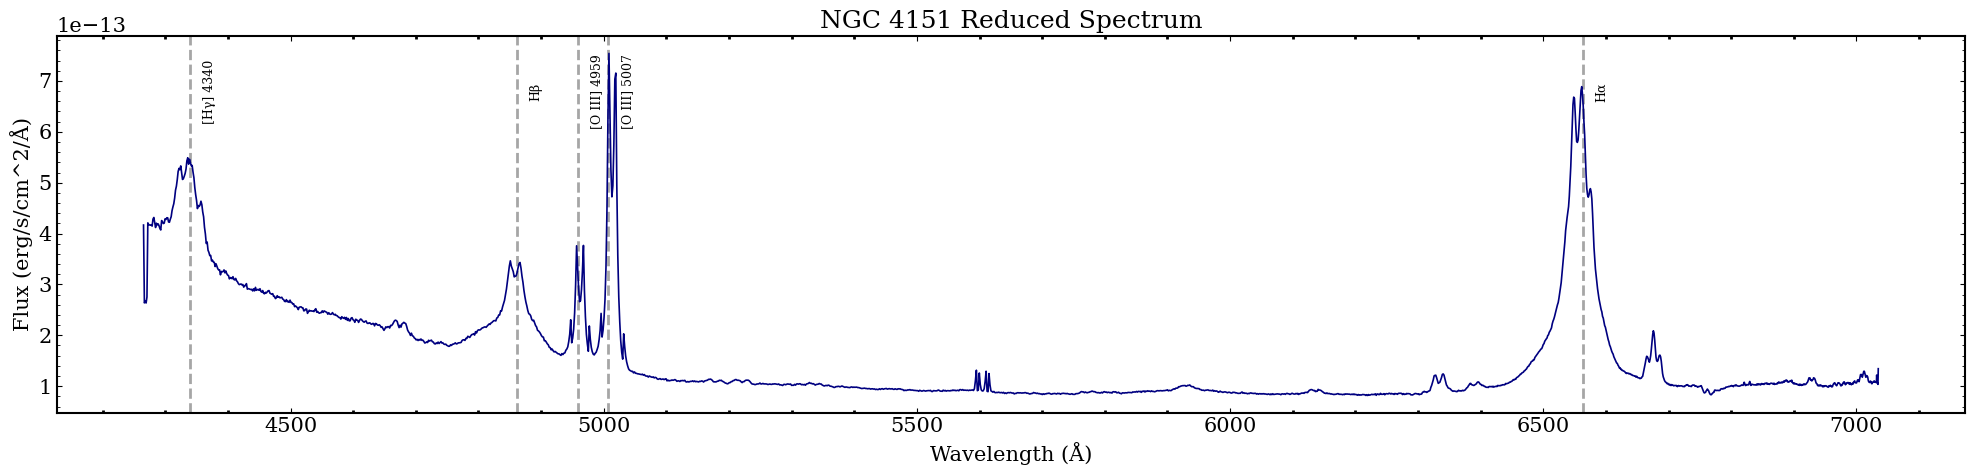

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d


coeffs = [-1.67582138e-07, 6.27623032e-04, 8.00859881e-01, 3.60890966e+03]

num_pixels = final.shape[-1] 
pixels = np.arange(num_pixels)

wavelengths = np.polyval(coeffs, pixels)
cutoff = 600
trimmed_wavelengths = wavelengths[cutoff:]
trimmed_spectrum = spectrum_1d_cropped[:]
print(len(trimmed_spectrum))
print(len(trimmed_wavelengths))

threshold = 0.5 

cleaned_spectrum = trimmed_spectrum.copy()

for i in range(1, len(trimmed_spectrum) - 5):
    left = trimmed_spectrum[i - 5]
    center = trimmed_spectrum[i]
    right = trimmed_spectrum[i + 5]
    
    if center > threshold * max(left, right):
        cleaned_spectrum[i] = (left + right) / 2  

smoothed = gaussian_filter1d(cleaned_spectrum, sigma=1)

normalized = (smoothed - np.min(smoothed)) / (np.max(smoothed) - np.min(smoothed))

lines = {
    'Hβ': 4861,
    'Hα': 6563,
    '[O III] 4959': 4959,
    '[O III] 5007': 5007,
    '[Hγ] 4340': 4340
}

z = 0.003262

# observed_lines = {name: wl * (1 + z) for name, wl in lines.items()}

resting_lines = {name: wl for name, wl in lines.items()}


rest_wavelengths = trimmed_wavelengths / (1 + z)


V_mag = 11.48

# V-band zero point in erg/s/cm^2/Å at ~5500 Å (approximate)
F0_V = 3.6e-9  # erg/s/cm^2/Å

F_V = F0_V * 10**(-0.4 * V_mag)
print(f"Estimated V-band flux: {F_V:.2e} erg/s/cm^2/Å")



idx_near_5500 = np.where((rest_wavelengths > 5450) & (rest_wavelengths < 5550))[0]
mean_counts_5500 = np.mean(cleaned_spectrum[idx_near_5500])

scaling_factor = F_V / mean_counts_5500

flux_spectrum = cleaned_spectrum * scaling_factor


plt.figure(figsize=(20, 5))

for name, obs_wl in resting_lines.items():
    plt.axvline(obs_wl, color='grey', linestyle='--', alpha=0.7)
    plt.text(obs_wl + 20, max(flux_spectrum) * 0.9, name, rotation=90,
             verticalalignment='center', fontsize=9, color='black')
#plt.plot(trimmed_wavelengths, trimmed_spectrum, label="Original Trimmed", alpha=0.4, color='gray')
plt.plot(rest_wavelengths, flux_spectrum, label="Spectrum", color='navy', linewidth=1.2)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (erg/s/cm^2/Å)")
plt.title("NGC 4151 Reduced Spectrum")
plt.tight_layout()

plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.3
plt.rcParams['legend.labelspacing'] = 0.3
plt.rcParams['legend.handletextpad'] = 0.3
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'DejaVu Serif'
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.width'] = 2
plt.rcParams["axes.linewidth"] = 1.5
plt.show()




In [ ]:
from astropy.io import fits
import numpy as np

flux_data = flux_spectrum 
wavelength_data = rest_wavelengths

z = 0.1 
V_mag = 20.5
object_name = "NGC 4151" 
reduction_date = "2025-04-26" 

primary_hdu = fits.PrimaryHDU()

flux_column = fits.Column(name='flux', array=flux_data, format='E')  # 'E' for float32 type
wavelength_column = fits.Column(name='wavelength', array=wavelength_data, format='E') 

columns = fits.ColDefs([flux_column, wavelength_column]) 

table_hdu = fits.BinTableHDU.from_columns(columns)

table_hdu.header['Z'] = z 
table_hdu.header['V_MAG'] = V_mag 
table_hdu.header['OBJECT'] = object_name 
table_hdu.header['DATE'] = reduction_date 

hdul = fits.HDUList([primary_hdu, table_hdu])

output_file = "NGC4151_spectrum.fits"
hdul.writeto(output_file, overwrite=True)

print(f"FITS file saved successfully: {output_file}")


FITS file saved successfully: NGC4151_spectrum.fits


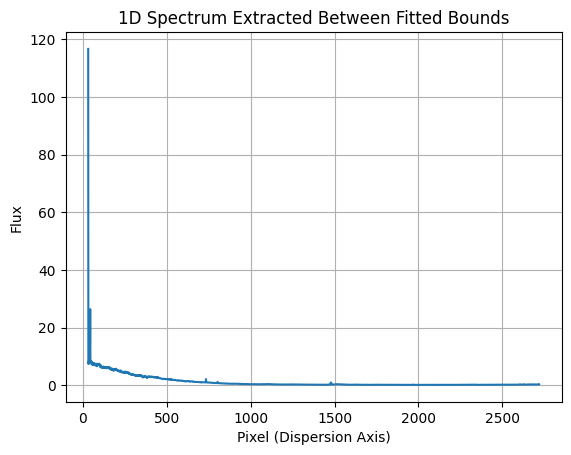

In [64]:
spectrum_1d = []

for x in range(final.shape[1]):
    y_low = int(lower_fit(x))
    y_high = int(upper_fit(x))
    if 0 <= y_low < y_high <= final.shape[0]:
        spectrum_1d.append(np.sum(final[y_low:y_high, x]))
    else:
        spectrum_1d.append(0)

spectrum_1d = np.array(spectrum_1d)

plt.plot(spectrum_1d)
plt.title("1D Spectrum Extracted Between Fitted Bounds")
plt.xlabel("Pixel (Dispersion Axis)")
plt.ylabel("Flux")
plt.grid()
plt.show()

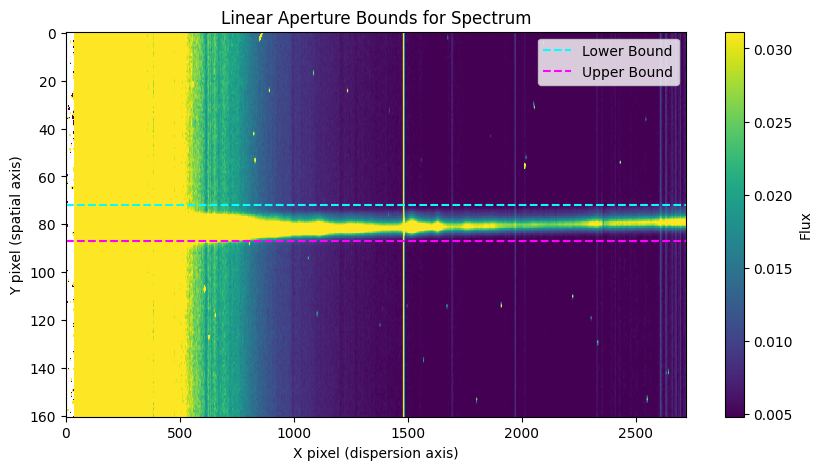

In [67]:
plt.figure(figsize=(10, 5))
plt.imshow(final, aspect='auto', cmap='viridis',
           vmin=np.percentile(final, 25), vmax=np.percentile(final, 80))
plt.axhline(y_lower, color='cyan', linestyle='--', label='Lower Bound')
plt.axhline(y_upper, color='magenta', linestyle='--', label='Upper Bound')
plt.legend()
plt.title("Linear Aperture Bounds for Spectrum")
plt.xlabel("X pixel (dispersion axis)")
plt.ylabel("Y pixel (spatial axis)")
plt.colorbar(label='Flux')
plt.show()

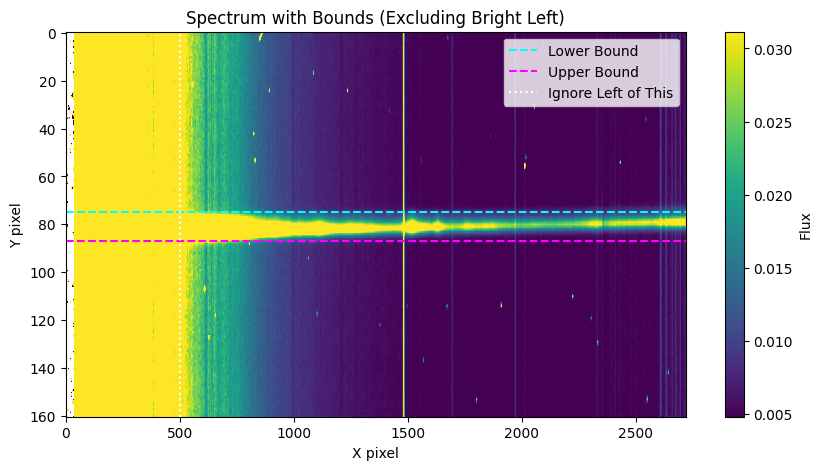

In [76]:
plt.figure(figsize=(10, 5))
plt.imshow(final, aspect='auto', cmap='viridis',
           vmin=np.percentile(final, 25), vmax=np.percentile(final, 80))
plt.axhline(y_lower+3, color='cyan', linestyle='--', label='Lower Bound')
plt.axhline(y_upper, color='magenta', linestyle='--', label='Upper Bound')
plt.axvline(500, color='white', linestyle=':', label='Ignore Left of This')
plt.legend()
plt.title("Spectrum with Bounds (Excluding Bright Left)")
plt.xlabel("X pixel")
plt.ylabel("Y pixel")
plt.colorbar(label='Flux')
plt.show()


In [47]:
from astropy.io import fits

hdul = fits.open(clean_path)
print(f"Number of HDUs: {len(hdul)}")
for i, hdu in enumerate(hdul):
    print(f"HDU {i}: {type(hdu)}")

for i, hdu in enumerate(hdul):
    print(f"\nHDU {i} header:")
    for j, card in enumerate(hdu.header.cards):
        print(f"{j}: {card}")

from astropy.io import fits

with fits.open(clean_path, mode='update') as hdul:
    header = hdul[0].header
    if 'P.I.' in header:
        del header['P.I.']
    hdul.flush()

# Re-open the cleaned FITS file and verify
with fits.open(clean_path) as hdul:
    hdul.verify('silentfix')  # Should pass now
    header = hdul[0].header
    print(header)

Number of HDUs: 1
HDU 0: <class 'astropy.io.fits.hdu.image.PrimaryHDU'>

HDU 0 header:
0: SIMPLE  =                    T / Primary FITS image array                       
1: BITPIX  =                   16                                                  
2: NAXIS   =                    2 / NUMBER OF AXES                                 
3: NAXIS1  =                 2720 / CHIP WIDTH                                     
4: NAXIS2  =                  161 / CHIP HEIGHT                                    
5: EXTEND  =                    F / Fits standard                                  
6: OBJECT  = 'OJ287             ' / OBJECT NAME                                    
7: NAMPS   =                    1                                                  
8: DATE    = '2025-03-19T04:18:47' / UT date/time at start                         
9: DATE-OBS= '2025-03-19        ' / UT date/time at start                          
10: RA      = '08:54:48.8        ' / RA                                  

SIMPLE  =                    T / Primary FITS image array                       BITPIX  =                   16                                                  NAXIS   =                    2 / NUMBER OF AXES                                 NAXIS1  =                 2720 / CHIP WIDTH                                     NAXIS2  =                  161 / CHIP HEIGHT                                    EXTEND  =                    F / Fits standard                                  OBJECT  = 'OJ287             ' / OBJECT NAME                                    NAMPS   =                    1                                                  DATE    = '2025-03-19T04:18:47' / UT date/time at start                         DATE-OBS= '2025-03-19        ' / UT date/time at start                          RA      = '08:54:48.8        ' / RA                                             DEC     = '20:06:30.639583620' / DEC                                            ROTANGLE= '085               ' / ROT ANG

In [79]:
comp_header = fits.getheader(comp_path)
print(comp_header)


SIMPLE  =                    T / Primary FITS image array                       BITPIX  =                   16                                                  NAXIS   =                    2 / NUMBER OF AXES                                 NAXIS1  =                 2720 / CHIP WIDTH                                     NAXIS2  =                  161 / CHIP HEIGHT                                    EXTEND  =                    F / Fits standard                                  OBJECT  = 'COMP              ' / OBJECT NAME                                    NAMPS   =                    1                                                  DATE    = '2025-03-19T06:58:34' / UT date/time at start                         DATE-OBS= '2025-03-19        ' / UT date/time at start                          RA      = '12:29:06.69       ' / RA                                             DEC     = '02:03:08.59       ' / DEC                                            EPOCH   = '2000              ' / EPOCH  

In [ ]:
from astropy.io import fits

comp_path = 'C:/Users/jimmy/OneDrive/Astron100/Day1/Comp/0063.COMP_3C273.fits'

p = fits.getheader(comp_path)

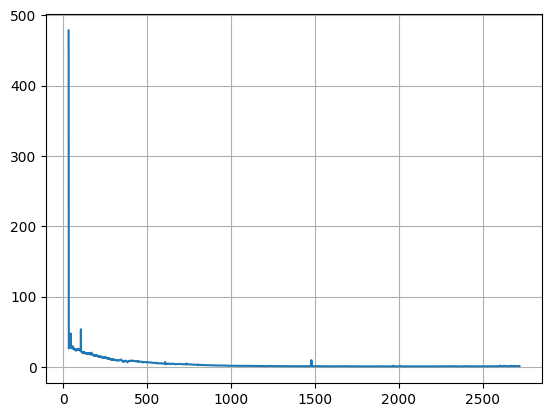

In [48]:
spectrum_1d = np.sum(final, axis=0) 
plt.plot(spectrum_1d)
plt.grid()
plt.show()

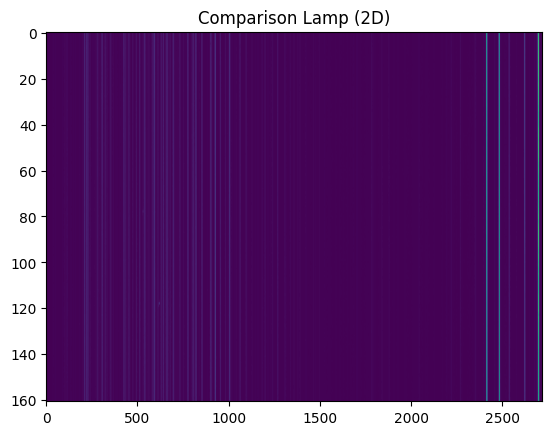

In [ ]:
comp_path = 'C:/Users/jimmy/OneDrive/Astron100/Day1/Comp/0063.COMP_3C273.fits'
comp_data = fits.getdata(comp_path)

plt.imshow(comp_data, aspect='auto', cmap='viridis')
plt.title('Comparison Lamp (2D)')
plt.show()

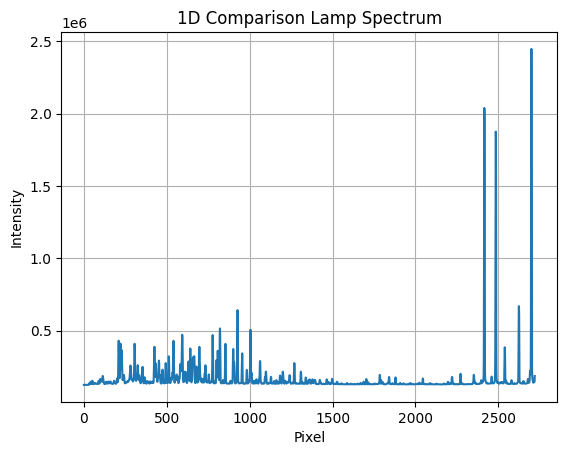

In [10]:
comp_spectrum_1d = np.sum(comp_data, axis=0)
plt.plot(comp_spectrum_1d)
plt.title('1D Comparison Lamp Spectrum')
plt.xlabel('Pixel')
plt.ylabel('Intensity')
plt.grid()
plt.show()

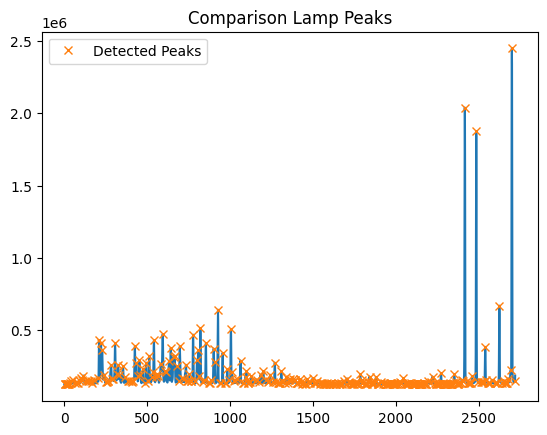

In [11]:
from scipy.signal import find_peaks

peaks, _ = find_peaks(comp_spectrum_1d, height=1000)  # tune height threshold
plt.plot(comp_spectrum_1d)
plt.plot(peaks, comp_spectrum_1d[peaks], "x", label='Detected Peaks')
plt.legend()
plt.title("Comparison Lamp Peaks")
plt.show()

In [12]:
pixel_vals = np.array([153, 278, 398])
wave_vals = np.array([5460, 5769, 6143])